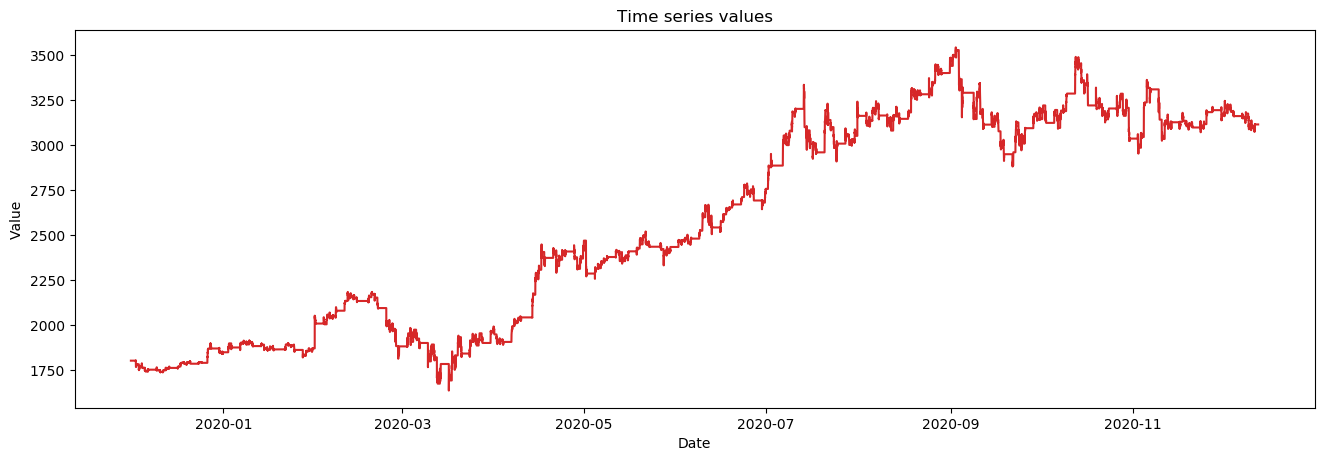

In [8]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
#import sklearn 
import talib as ta
import itertools

def srt_dt(x):
    try:
        return datetime.strptime(str(x), '%d.%m.%Y %H:%M:%S.000 GMT+0100')
    except :
        return datetime.strptime(str(x), '%d.%m.%Y %H:%M:%S.000 GMT+0200')- timedelta(hours=1) 
    
    
Data1=(pd.read_csv('AMZN.USUSD_Candlestick_10_m_BID_01.12.2019-12.12.2020.csv', \
                 encoding='utf-8', sep=',')
     .drop_duplicates(subset = 'Local time')
     )
Data1['Local time']=Data1['Local time'].apply(srt_dt)

Data1['Local time']=pd.to_datetime(Data1['Local time'])
df=Data1.copy()#pd.concat([Data1, Data2, Data3])


title="Time series values"
xlabel='Date'
ylabel='Value'
plt.figure(figsize=(16,5), dpi=100)
plt.plot(df['Local time'], df['Open'], color='tab:red')
plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
plt.show()

In [30]:
df['return']=df['Close'].shift(-1)-df['Close']
df['achat']=df['return'].apply(lambda x: 1 if x>2 else 0)
df['vente']=df['return'].apply(lambda x: 1 if x<-2 else 0)

In [13]:
def compute_rsi(df, time_period=30):
    real = ta.RSI(df['Close'].values, timeperiod=time_period)
    df['RSI']=real

In [14]:
compute_rsi(df)

In [45]:
df=df.rename(columns={'Open':'value_o', 'High':'value_h', 'Low':'value_l', 'Close':'value_c', 'Volume':'value_v'})

In [27]:
df['RSI_acheteur']=df['RSI'].apply(lambda x: 1 if x>50 else 0)

In [31]:
# Probabilité que le marché soit achteur: 0.5146
df[['RSI_acheteur']].describe()

,RSI_acheteur
count,54432.00000
mean,0.51466
std,0.49979
min,0.00000
25%,0.00000
50%,1.00000
75%,1.00000
max,1.00000


In [36]:
# probabilité d'avoir un marché acheteur et que le trad soit 
df[(df['RSI_acheteur']==1)&(df['achat']==1)].shape[0]/df.shape[0]

0.03433641975308642

In [38]:
# probabilité conditionnel
0.03433/0.5146

0.06671200932763312

In [42]:
# Prepare data
df['year'] = df['Local time'].apply(lambda x: x.year)
df['month'] = df['Local time'].apply(lambda x: x.month)
df['day'] = df['Local time'].apply(lambda x: x.day)
df['hour'] = df['Local time'].apply(lambda x: x.hour)
df['week'] = df['Local time'].apply(lambda x:x.isocalendar()[1])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


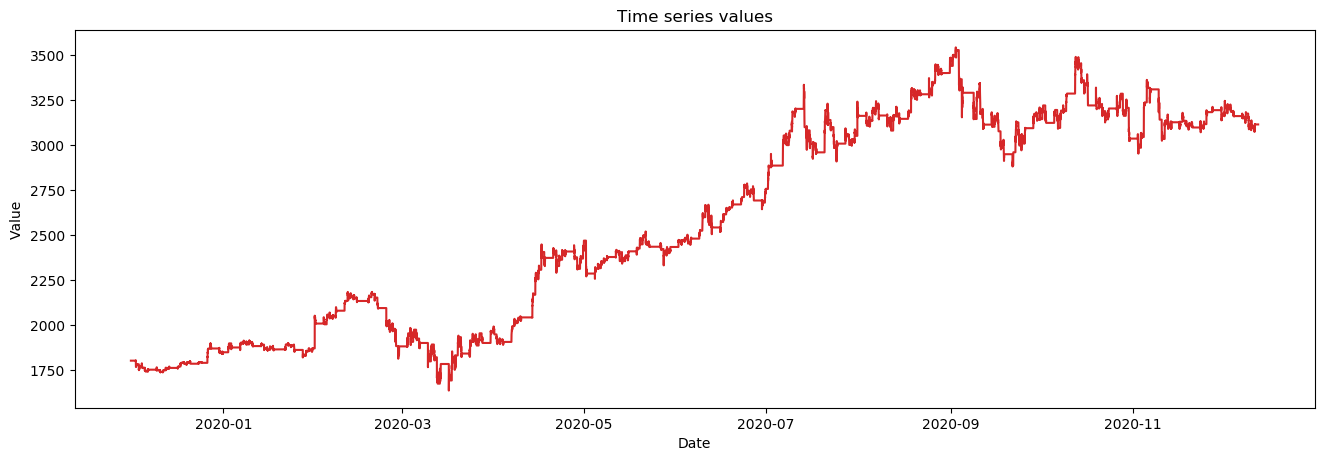

In [39]:
df

,Local time,Open,High,Low,Close,Volume,RSI,RSI_achteur,RSI_acheteur,return,achat,vente
0,2019-12-01 00:00:00,1801.297,1801.297,1801.297,1801.297,0.0,NaN,0,0,0.0,0,0
1,2019-12-01 00:10:00,1801.297,1801.297,1801.297,1801.297,0.0,NaN,0,0,0.0,0,0
2,2019-12-01 00:20:00,1801.297,1801.297,1801.297,1801.297,0.0,NaN,0,0,0.0,0,0
3,2019-12-01 00:30:00,1801.297,1801.297,1801.297,1801.297,0.0,NaN,0,0,0.0,0,0
4,2019-12-01 00:40:00,1801.297,1801.297,1801.297,1801.297,0.0,NaN,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
54427,2020-12-12 23:10:00,3115.338,3115.338,3115.338,3115.338,0.0,60.242471,1,1,0.0,0,0
54428,2020-12-12 23:20:00,3115.338,3115.338,3115.338,3115.338,0.0,60.242471,1,1,0.0,0,0
54429,2020-12-12 23:30:00,3115.338,3115.338,3115.338,3115.338,0.0,60.242471,1,1,0.0,0,0
54430,2020-12-12 23:40:00,3115.338,3115.338,3115.338,3115.338,0.0,60.242471,1,1,0.0,0,0


In [40]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
stat, p = shapiro(df['Open'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.880, p=0.000
Probably not Gaussian


C:\Users\saad\AppData\Roaming\Python\Python37\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [41]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
stat, p = shapiro(np.log(df['Open'].values))
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.877, p=0.000
Probably not Gaussian


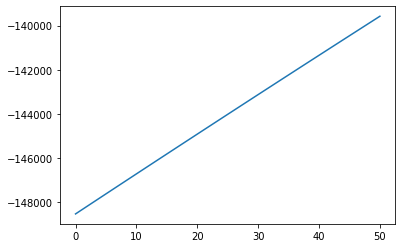

In [48]:

from numpy import array, linspace
from sklearn.neighbors.kde import KernelDensity


a = df['Open'].values.reshape(-1, 1)
kde = KernelDensity(kernel='gaussian', bandwidth=3).fit(a)
s = linspace(0,50)
e = kde.score_samples(s.reshape(-1,1))
plt.plot(s, e)

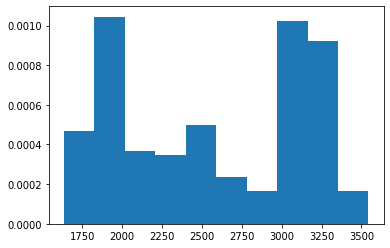

In [55]:
count, bins, ignored = plt.hist(df['Open'].values, 10, density=True)
#plt.plot(bins, np.ones_like(bins))
plt.show()

In [60]:
from scipy.stats import spearmanr

stat, p = spearmanr(df['Open'].values, df['RSI'].values)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.098, p=0.000
Probably dependent


In [46]:
# df with sesonal weekly
df_day=df.copy()
df_day.set_index('Local time', inplace=True)

df_day=pd.DataFrame(df_day['value_o'].resample('W').last())
df_day=df_day.loc[~pd.isnull(df_day['value_o']),:]
df_day=df_day.reset_index()
df_day['year'] = df_day['Local time'].apply(lambda x: x.year)
df_day['month'] = df_day['Local time'].apply(lambda x: x.month)

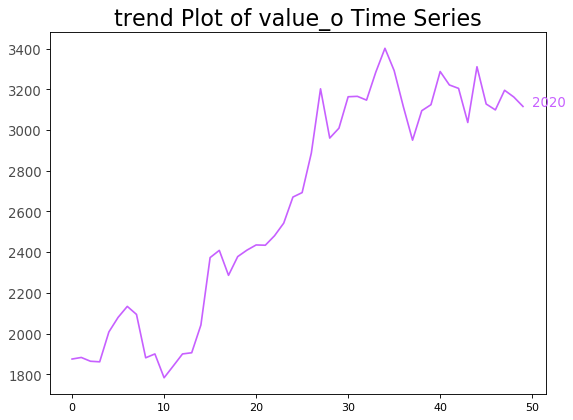

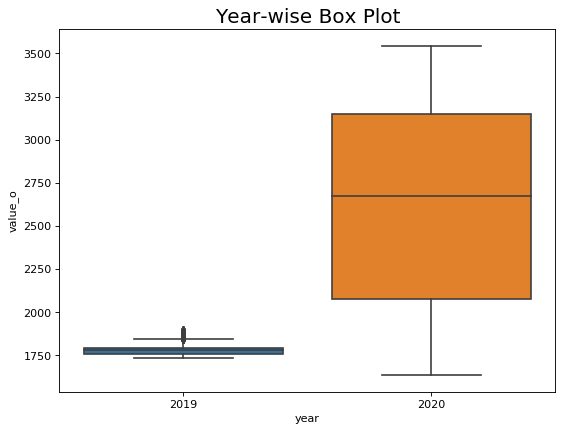

In [47]:
years = df['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(8,6), dpi= 80)
for i, y in enumerate(years):
    if i >0:
        #plt.plot('Local time', 'value_o', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.plot(df_day.loc[(df_day.year==y), :]['value_o'].values, color=mycolors[i], label=y)
        plt.text(df_day.loc[df_day.year==y, :].shape[0], df_day.loc[df_day.year==y, 'value_o'][-1:].values[0], y, fontsize=12, color=mycolors[i])
        

# Decoration
#plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("trend Plot of value_o Time Series", fontsize=20)
plt.show()

# Draw Plot
plt.figure(figsize=(8,6), dpi= 80)
sns.boxplot(x='year', y='value_o', data=df)
# Set Title
plt.title('Year-wise Box Plot', fontsize=18); 

plt.show()

In [36]:
df

,Local time,Open,High,Low,Close,Volume,return,biachat,diff
0,2019-12-01 00:00:00,1801.297,1801.297,1801.297,1801.297,0.0,0.0,0,0.0
1,2019-12-01 00:10:00,1801.297,1801.297,1801.297,1801.297,0.0,0.0,0,0.0
2,2019-12-01 00:20:00,1801.297,1801.297,1801.297,1801.297,0.0,0.0,0,0.0
3,2019-12-01 00:30:00,1801.297,1801.297,1801.297,1801.297,0.0,0.0,0,0.0
4,2019-12-01 00:40:00,1801.297,1801.297,1801.297,1801.297,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...
54427,2020-12-12 23:10:00,3115.338,3115.338,3115.338,3115.338,0.0,0.0,0,0.0
54428,2020-12-12 23:20:00,3115.338,3115.338,3115.338,3115.338,0.0,0.0,0,0.0
54429,2020-12-12 23:30:00,3115.338,3115.338,3115.338,3115.338,0.0,0.0,0,0.0
54430,2020-12-12 23:40:00,3115.338,3115.338,3115.338,3115.338,0.0,0.0,0,0.0


In [48]:
# df resample daily 
df_day=df.copy()
df_day.set_index('Local time', inplace=True)

df_day=pd.DataFrame(df_day['value_o'].resample('D').last())
df_day=df_day.loc[~pd.isnull(df_day['value_o']),:]
df_day=df_day.reset_index()
df_day['year'] = df_day['Local time'].apply(lambda x: x.year)
df_day['month'] = df_day['Local time'].apply(lambda x: x.month)

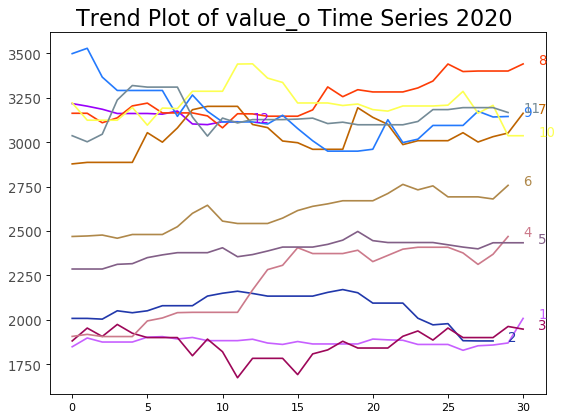

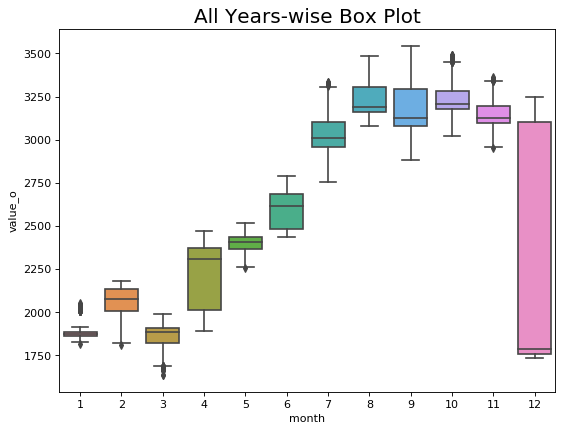

In [51]:
month = df['month'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(month), replace=False)

# Draw Plot
plt.figure(figsize=(8,6), dpi= 80)
for i, m in enumerate(month):
    #if i >0:
        #plt.plot('Local time', 'value_o', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.plot(df_day.loc[(df_day.year==2020)&(df_day.month==m), :]['value_o'].values, color=mycolors[i], label=y)
        plt.text(df_day.loc[(df_day.year==2020)&(df_day.month==m), :].shape[0], df_day.loc[(df_day.year==2020)&(df_day.month==m), 'value_o'][-1:].values[0], m, fontsize=12, color=mycolors[i])
        

# Decoration
#plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Trend Plot of value_o Time Series 2020 ", fontsize=20)
plt.show()

# Draw Plot
plt.figure(figsize=(8,6), dpi= 80)
sns.boxplot(x='month', y='value_o', data=df)
# Set Title
plt.title('All Years-wise Box Plot', fontsize=18); 

plt.show()

# Analyse de sesonalité

In [53]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

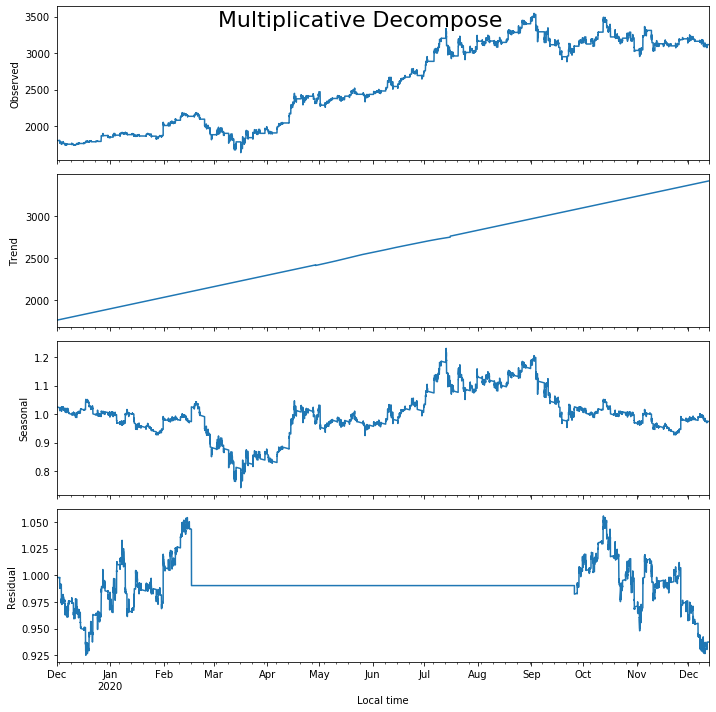

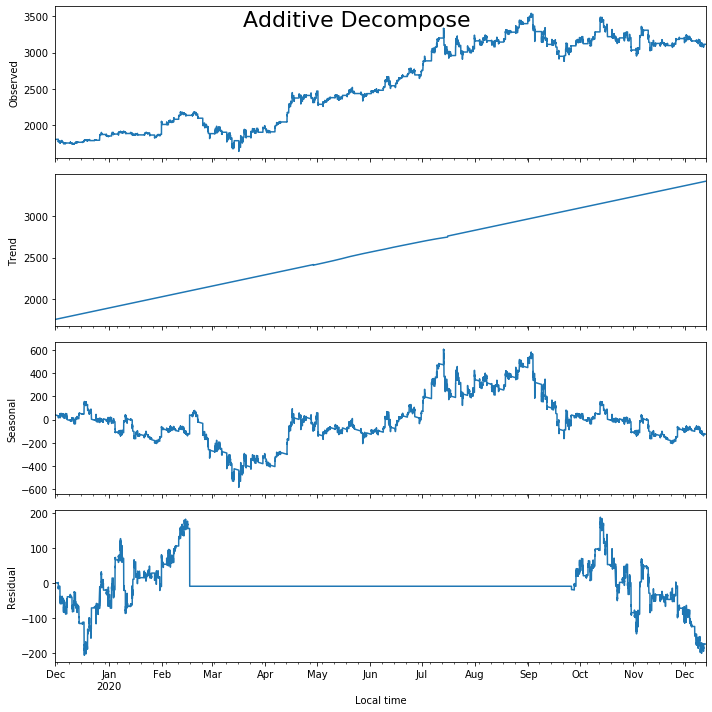

In [54]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(df[['Local time', 'value_o']].set_index('Local time')['value_o'], model='multiplicative', extrapolate_trend='freq', freq=43200)

# Additive Decomposition
result_add = seasonal_decompose(df[['Local time', 'value_o']].set_index('Local time')['value_o'], model='additive', extrapolate_trend='freq', freq=43200)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()